In [1]:
from phomo import Master, Pool, Mosaic
from PIL import Image

# Face dataset from:

https://susanqq.github.io/UTKFace/

dl link: https://drive.google.com/drive/folders/0BxYys69jI14kU0I1YUQyY1ZDRUE?resourcekey=0-01Pth1hq20K4kuGVkp3oBw

Download and extract to `faces/` folder.

Dataset contains 9780 200x200 images of faces.

In [2]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))
pool

Loading tiles:   0%|          | 0/9780 [00:00<?, ?it/s]

phomo.pool.Pool at 0x7f5c4ccbbac0:
    len: 9780

# Master image:

A random face from the dataset

In [3]:
from random import sample
from pathlib import Path

master_file = sample(list(Path("faces").glob('*')), 1)[0]

In [4]:
master = Master.from_file(master_file, img_size=(400, 400))
master

phomo.master.Master at 0x7f5ca005e1f0:
    shape: (400, 400, 3)

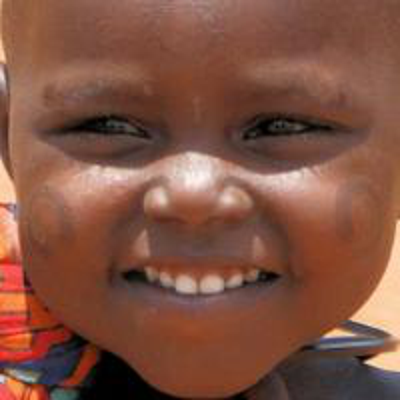

In [5]:
master.img

# Mosaic:

In [6]:
mosaic = Mosaic(master, pool)
mosaic

phomo.mosaic.Mosaic at 0x7f5c4cc787c0:
    n_appearances: 1
    mosaic size: (400, 400)
    tile shape: (20, 20)
    leftover tiles: 9380
    phomo.grid.Grid at 0x7f5c4cc78460:
        origin: (0, 0)
        len slices: 400
        thresholds: []
    phomo.master.Master at 0x7f5ca005e1f0:
        shape: (400, 400, 3)
    phomo.pool.Pool at 0x7f5c4ccbbac0:
        len: 9780

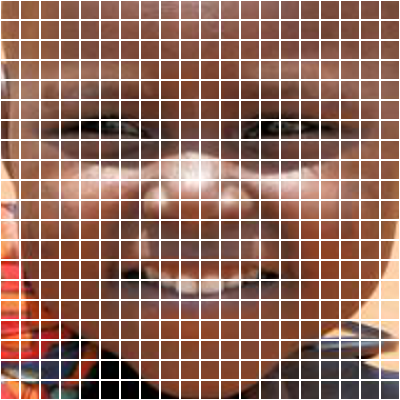

In [7]:
mosaic.grid.plot()

Building distance matrix:   0%|          | 0/400 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/400 [00:00<?, ?it/s]

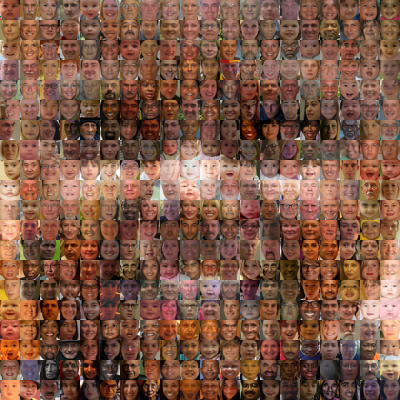

In [8]:
mosiac_img = mosaic.build()
mosiac_img

Using PIL to blend the master with the mosaic to smooth out the jaggedness.

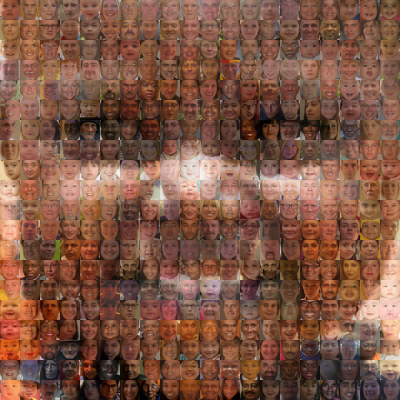

In [9]:
Image.blend(mosiac_img, master.img, 0.3)

# Subdivide tiles with higher contrast 

Loading tiles:   0%|          | 0/9780 [00:00<?, ?it/s]

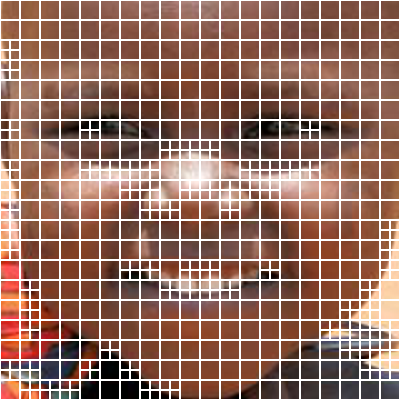

In [10]:
pool = Pool.from_dir("faces/", crop_ratio=1, tile_size=(20, 20))
master = Master.from_file(master_file, img_size=(400, 400))
mosaic = Mosaic(master, pool)
mosaic.grid.subdivide(0.1)
mosaic.grid.plot()

Building distance matrix:   0%|          | 0/604 [00:00<?, ?it/s]

Building mosaic:   0%|          | 0/604 [00:00<?, ?it/s]

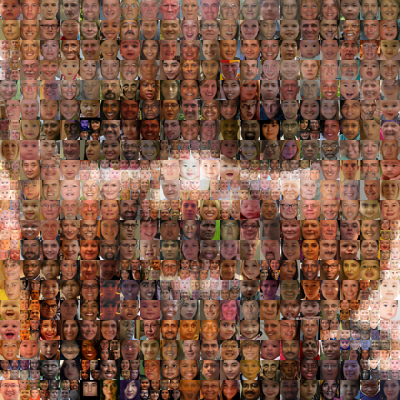

In [11]:
mosaic.build()